In [1]:
#!pip install mlxtend  


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [5]:
# 'filtered_name' is the file which contains FFW and phenotype features
xls=pd.read_csv('filtered_name.csv')

In [6]:
xls.head()

Unnamed: 0          SPECIES     COMNM MATNM  LCCD  PLTID TRLID BLOCK COL  \
0           0  Cannabis sativa  Cannabis  Kush  NZPN      1   CB1     A   A   
1           2  Cannabis sativa  Cannabis  Kush  NZPN      3   CB1     A   A   
2           4  Cannabis sativa  Cannabis  Kush  NZPN      5   CB1     A   B   
3           6  Cannabis sativa  Cannabis  Kush  NZPN      7   CB1     A   B   
4           7  Cannabis sativa  Cannabis  Kush  NZPN      8   CB1     A   B   

   ROW  ... DANT.L9_49 DNBI.L9_49 DCHL.L10_49  DFLA.L10_49  DANT.L10_49  \
0    1  ...      0.156      24.45         NaN          NaN          NaN   
1    3  ...      0.154      21.22      36.376        2.094        0.184   
2    1  ...      0.186      16.00         NaN          NaN          NaN   
3    3  ...      0.125      18.85      35.393        2.138        0.132   
4    4  ...      0.165      17.04      32.485        2.130        0.201   

   DNBI.L10_49  DCHL.L11_49  DFLA.L11_49  DANT.L11_49  DNBI.L11_49  
0          NaN          NaN          NaN          NaN          NaN  
1        17.37          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3        16.56          NaN          NaN          NaN          NaN  
4        15.25          NaN          NaN          NaN          NaN  

[5 rows x 192 columns]

In [6]:
# filter kush and angel cultivate
Kush_xls=xls[(xls['MATNM']=='Kush')]
Angel_xls=xls[(xls['MATNM']=='Angel')]

In [7]:
# Remove null feature columns from angel and kyush
null_cols1 = Kush_xls.columns[Kush_xls.isnull().any()]
Kush_xls.drop(null_cols1, axis = 1, inplace = True)

/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
# remove those columns which are not features
Kush_xls1=Kush_xls.iloc[:,15:]
Kush_xls1.head()

FWFR_91    INL_21    INL_14  DCHL.L1_14  DFLA.L1_14  DANT.L1_14  \
0   10.605  0.769231  0.444444      28.941       1.548       0.134   
1   13.974  0.666667  0.476190      27.385       1.387       0.147   
2   11.400  0.533333  0.333333      32.379       1.603       0.117   
3    8.843  0.545455  0.400000      32.837       1.621       0.143   
4    8.687  0.615385  0.400000      30.535       1.573       0.123   

   DNBI.L1_14  PLTHGT_7  PLTHGT_14  PLTHGT_21  ...  DFLA.L1_28  DFLA.L2_28  \
0       18.69       2.8        4.5        6.5  ...       1.368       1.450   
1       19.74       3.2        4.2        7.5  ...       1.586       1.305   
2       20.20       4.2        6.0        7.5  ...       1.533       1.550   
3       20.25       3.0        5.0        5.5  ...       1.575       1.439   
4       19.41       3.4        5.0        6.5  ...       1.586       1.184   

   DFLA.L3_28  DFLA.L4_28  DFLA.L5_28  DANT.L1_28  DANT.L2_28  DANT.L3_28  \
0       1.543       1.700       1.582       0.143       0.152       0.143   
1       1.695       1.967       2.177       0.182       0.168       0.170   
2       1.806       2.073       1.920       0.170       0.170       0.161   
3       1.589       1.772       1.498       0.163       0.166       0.156   
4       1.504       1.664       1.975       0.152       0.252       0.152   

   DANT.L4_28  DANT.L5_28  
0       0.180       0.154  
1       0.159       0.185  
2       0.166       0.134  
3       0.154       0.134  
4       0.166       0.143  

[5 rows x 48 columns]

In [9]:
# extract features and measured FFW from new_angel
X_df=Kush_xls1.iloc[:,1:]
y_df=Kush_xls1.iloc[:,0]
print(y_df[:5])
print(X_df.head())

0    10.605
1    13.974
2    11.400
3     8.843
4     8.687
Name: FWFR_91, dtype: float64
     INL_21    INL_14  DCHL.L1_14  DFLA.L1_14  DANT.L1_14  DNBI.L1_14  \
0  0.769231  0.444444      28.941       1.548       0.134       18.69   
1  0.666667  0.476190      27.385       1.387       0.147       19.74   
2  0.533333  0.333333      32.379       1.603       0.117       20.20   
3  0.545455  0.400000      32.837       1.621       0.143       20.25   
4  0.615385  0.400000      30.535       1.573       0.123       19.41   

   PLTHGT_7  PLTHGT_14  PLTHGT_21  PLTHGT_28  ...  DFLA.L1_28  DFLA.L2_28  \
0       2.8        4.5        6.5       12.0  ...       1.368       1.450   
1       3.2        4.2        7.5       13.0  ...       1.586       1.305   
2       4.2        6.0        7.5       12.0  ...       1.533       1.550   
3       3.0        5.0        5.5       11.5  ...       1.575       1.439   
4       3.4        5.0        6.5       11.0  ...       1.586       1.184   

   DFLA.

TEST: [0]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


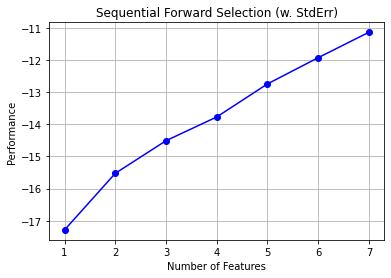

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.13
(43, 7)
TEST: [1]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


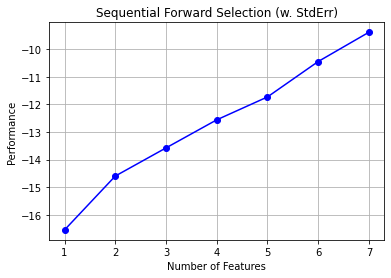

Selected features: (2, 10, 20, 25, 27, 40, 42)
Best MSE score: -9.38
(43, 7)
TEST: [2]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


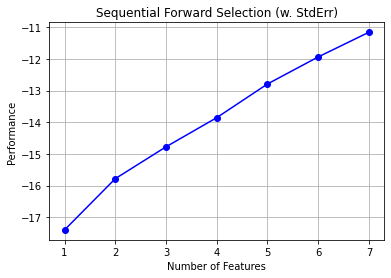

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.15
(43, 7)
TEST: [3]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


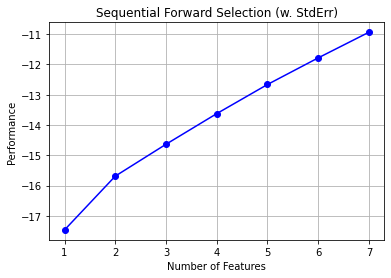

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.94
(43, 7)
TEST: [4]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


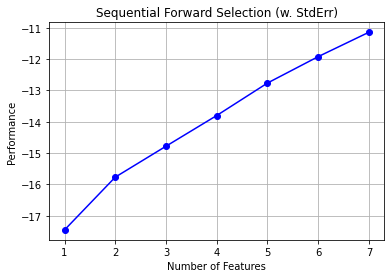

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.14
(43, 7)
TEST: [5]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


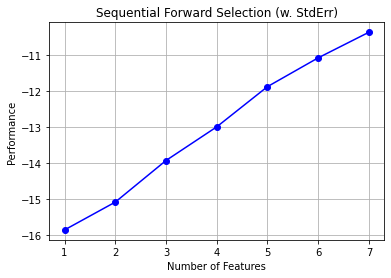

Selected features: (0, 10, 24, 27, 37, 40, 44)
Best MSE score: -10.36
(43, 7)
TEST: [6]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


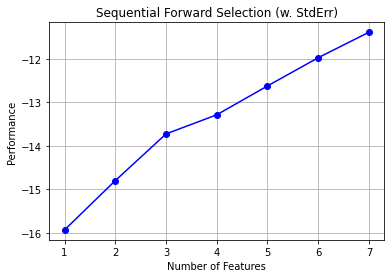

Selected features: (2, 3, 12, 14, 24, 39, 44)
Best MSE score: -11.38
(43, 7)
TEST: [7]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


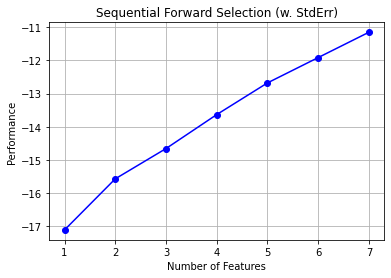

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.15
(43, 7)
TEST: [8]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


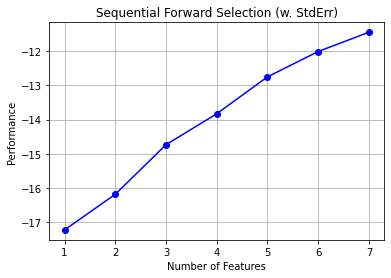

Selected features: (10, 20, 27, 37, 38, 40, 44)
Best MSE score: -11.44
(43, 7)
TEST: [9]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


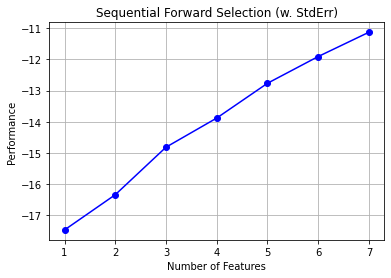

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.13
(43, 7)
TEST: [10]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


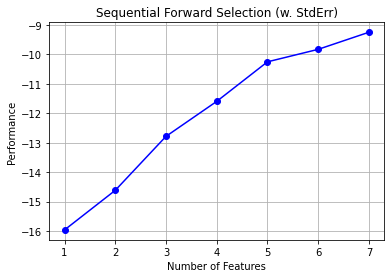

Selected features: (0, 11, 27, 34, 37, 40, 44)
Best MSE score: -9.25
(43, 7)
TEST: [11]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


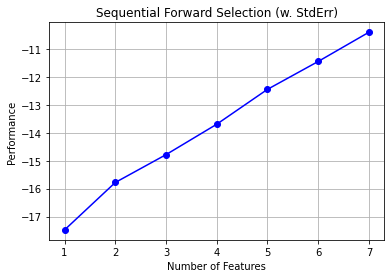

Selected features: (0, 10, 20, 27, 33, 37, 40)
Best MSE score: -10.41
(43, 7)
TEST: [12]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


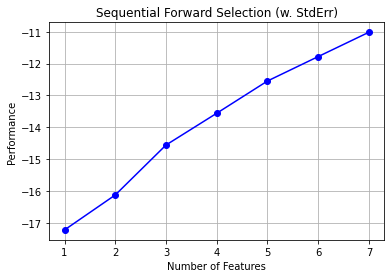

Selected features: (0, 10, 20, 27, 33, 37, 40)
Best MSE score: -11.02
(43, 7)
TEST: [13]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


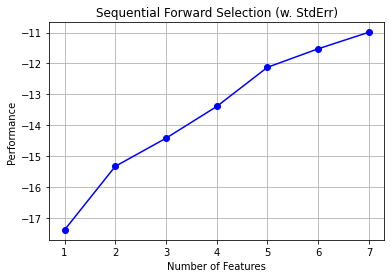

Selected features: (0, 8, 25, 27, 37, 38, 40)
Best MSE score: -10.99
(43, 7)
TEST: [14]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


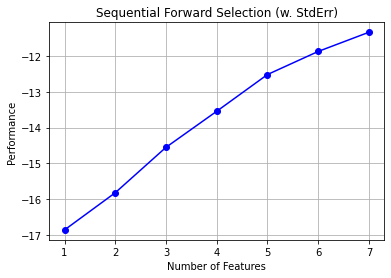

Selected features: (10, 20, 27, 37, 38, 40, 44)
Best MSE score: -11.33
(43, 7)
TEST: [15]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


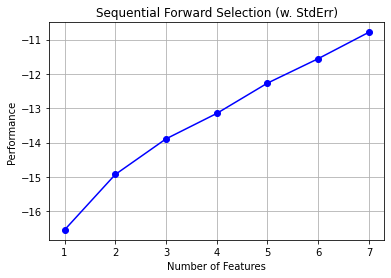

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.79
(43, 7)
TEST: [16]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


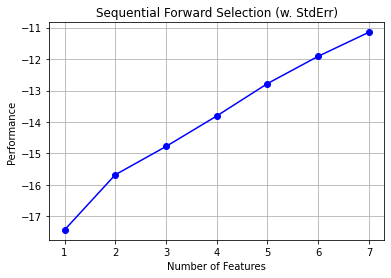

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.15
(43, 7)
TEST: [17]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


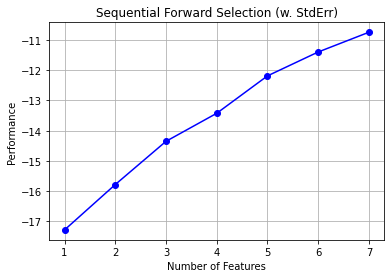

Selected features: (10, 20, 27, 37, 38, 40, 44)
Best MSE score: -10.75
(43, 7)
TEST: [18]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


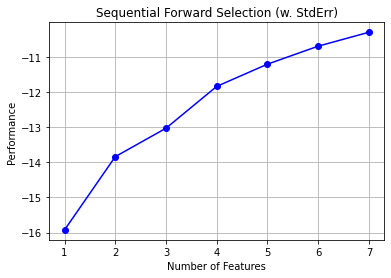

Selected features: (10, 16, 20, 27, 37, 40, 44)
Best MSE score: -10.29
(43, 7)
TEST: [19]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


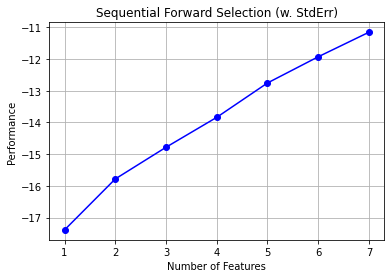

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.15
(43, 7)
TEST: [20]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


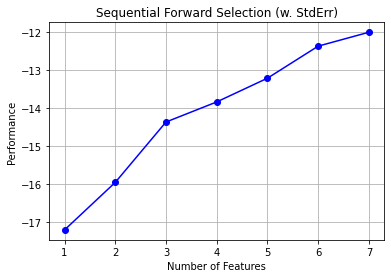

Selected features: (0, 3, 11, 24, 27, 37, 40)
Best MSE score: -12.00
(43, 7)
TEST: [21]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


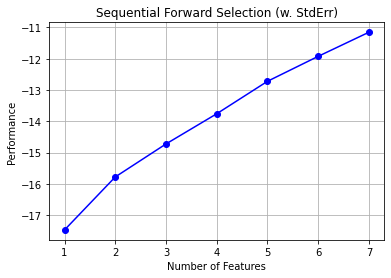

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.16
(43, 7)
TEST: [22]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


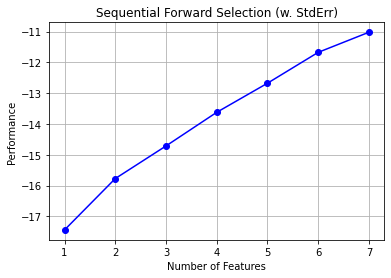

Selected features: (0, 10, 20, 27, 37, 40, 43)
Best MSE score: -11.02
(43, 7)
TEST: [23]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


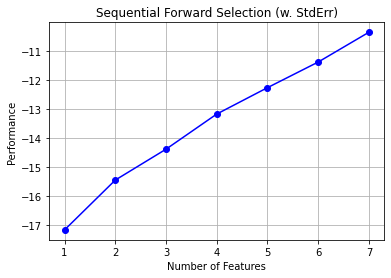

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.35
(43, 7)
TEST: [24]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


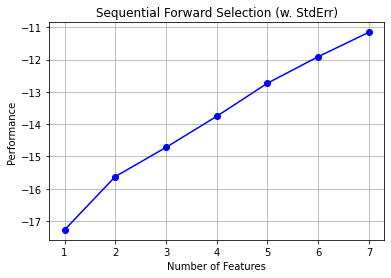

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.15
(43, 7)
TEST: [25]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


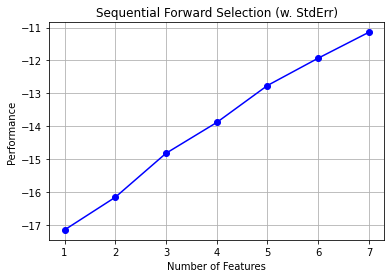

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.14
(43, 7)
TEST: [26]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


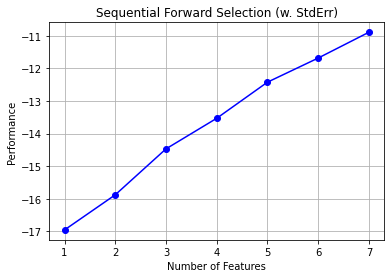

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.89
(43, 7)
TEST: [27]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


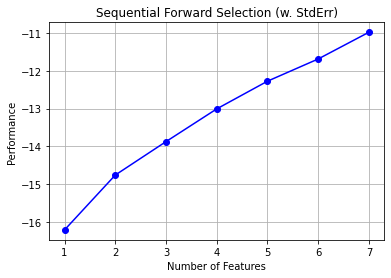

Selected features: (0, 13, 27, 37, 40, 43, 44)
Best MSE score: -10.98
(43, 7)
TEST: [28]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


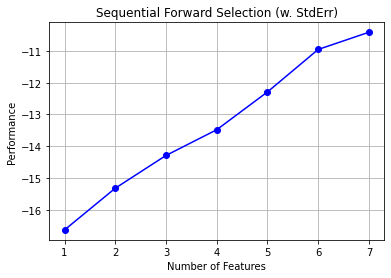

Selected features: (0, 10, 20, 27, 37, 39, 40)
Best MSE score: -10.41
(43, 7)
TEST: [29]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


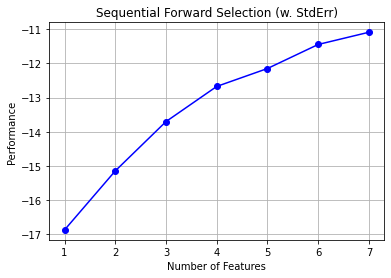

Selected features: (0, 10, 20, 27, 38, 40, 44)
Best MSE score: -11.09
(43, 7)
TEST: [30]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


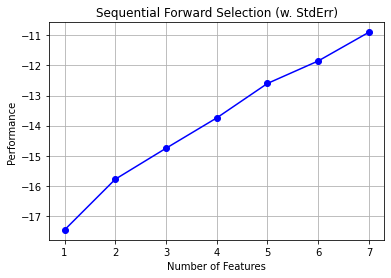

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.90
(43, 7)
TEST: [31]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


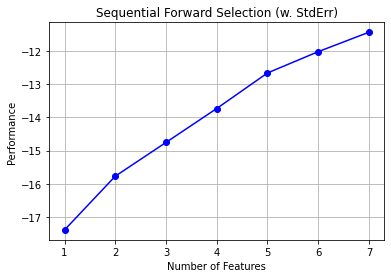

Selected features: (10, 20, 27, 37, 38, 40, 44)
Best MSE score: -11.44
(43, 7)
TEST: [32]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


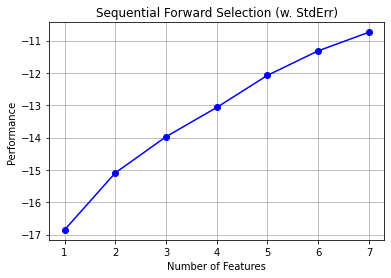

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.74
(43, 7)
TEST: [33]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


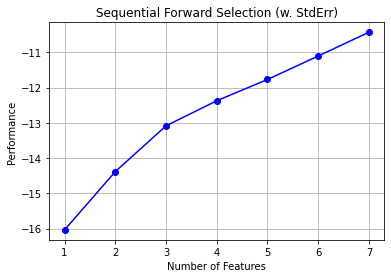

Selected features: (0, 3, 9, 24, 33, 37, 40)
Best MSE score: -10.43
(43, 7)
TEST: [34]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


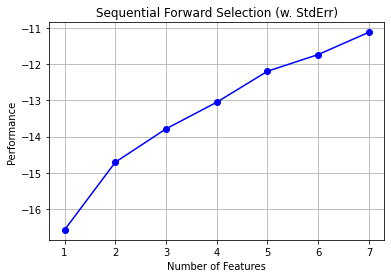

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.12
(43, 7)
TEST: [35]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


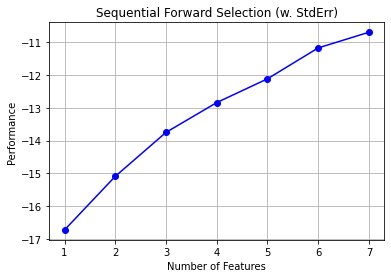

Selected features: (0, 3, 10, 24, 37, 41, 44)
Best MSE score: -10.70
(43, 7)
TEST: [36]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


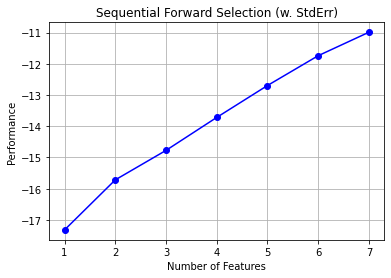

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -10.99
(43, 7)
TEST: [37]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


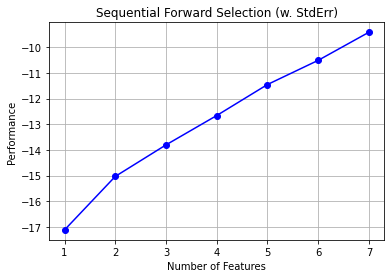

Selected features: (10, 16, 20, 27, 37, 38, 40)
Best MSE score: -9.42
(43, 7)
TEST: [38]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


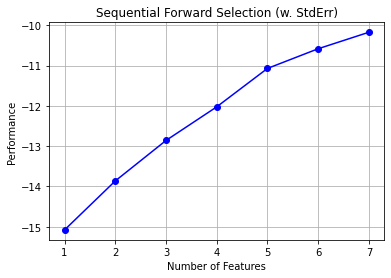

Selected features: (0, 10, 25, 33, 37, 40, 44)
Best MSE score: -10.17
(43, 7)
TEST: [39]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


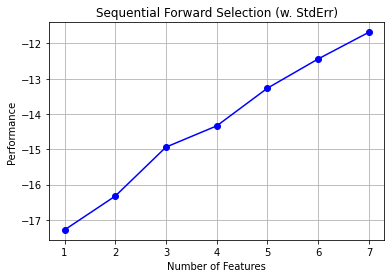

Selected features: (0, 3, 13, 24, 37, 40, 44)
Best MSE score: -11.68
(43, 7)
TEST: [40]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


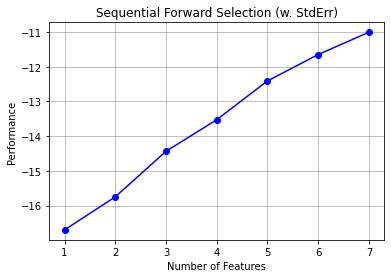

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.00
(43, 7)
TEST: [41]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


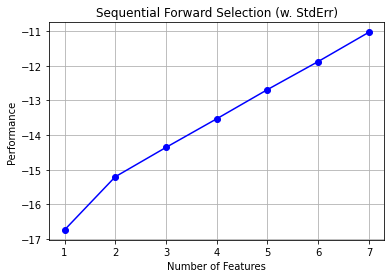

Selected features: (0, 10, 20, 25, 27, 37, 40)
Best MSE score: -11.03
(43, 7)
TEST: [42]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


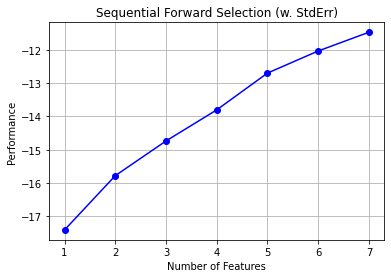

Selected features: (10, 20, 27, 37, 38, 40, 44)
Best MSE score: -11.47
(43, 7)
TEST: [43]


/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deep/PycharmProjects/biolumic/venv/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


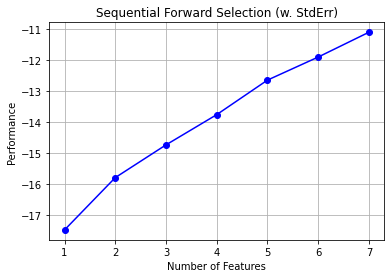

Selected features: (0, 10, 20, 27, 37, 38, 40)
Best MSE score: -11.10
(43, 7)
-2437.7888888927414
44882.71847959822


In [13]:
# %% below is leave one out cross validation (loocv) based sequential feature selection
loo = LeaveOneOut()
predi_y = []
all_y = []
index_= []
for train_index, test_index in loo.split(X_df,y_df):
    print("TEST:", test_index)
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df[train_index], y_df[test_index]
    lr = LinearRegression()
    sfs = SFS(lr, 
          k_features=7, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=0)
    sfs = sfs.fit(X_train.values, y_train)
    fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
    plt.title('Sequential Forward Selection (w. StdErr)')
    plt.grid()
    plt.show()
    print('Selected features:', sfs.k_feature_idx_)    
    print('Best MSE score: %.2f' % sfs.k_score_)
   
    
    X_train_efs = sfs.transform(X_train.values)
    X_test_efs = sfs.transform(X_test.values)
    print(X_train_efs.shape)
    svr = svm.SVR(kernel='linear')
    svr.fit(X_train_efs, y_train)
    y_pred = svr.predict(X_test_efs)
    predi_y.append(y_pred)
    all_y.append(y_test)

y_cv = np.vstack(predi_y);
y1 = np.vstack(all_y);

score_loocv = r2_score(y1, y_cv);
mse_loocv = mean_squared_error(y1, y_cv)
print(score_loocv)
print(mse_loocv)